In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('unicorns.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Updated at                  1199 non-null   object 
 1   Company                     1199 non-null   object 
 2   Crunchbase Url              1199 non-null   object 
 3   Last Valuation (Billion $)  1199 non-null   float64
 4   Date Joined                 1199 non-null   object 
 5   Year Joined                 1199 non-null   int64  
 6   City                        1181 non-null   object 
 7   Country                     1199 non-null   object 
 8   Industry                    1199 non-null   object 
 9   Investors                   1199 non-null   object 
 10  Company Website             0 non-null      float64
dtypes: float64(2), int64(1), object(8)
memory usage: 103.2+ KB


In [4]:
data.head(5)

,Updated at,Company,Crunchbase Url,Last Valuation (Billion $),Date Joined,Year Joined,City,Country,Industry,Investors,Company Website
0,"10/31/2022, 2:37:05 AM",Esusu,https://www.cbinsights.com/company/esusu,1.0,1/27/2022,2022,New York,United States,Fintech,"[""Next Play Ventures"",""Zeal Capital Partners"",...",NaN
1,"10/31/2022, 2:37:05 AM",Fever Labs,https://www.cbinsights.com/company/fever-labs,1.0,1/26/2022,2022,New York,United States,Internet software & services,"[""Accel"",""14W"",""GS Growth""]",NaN
2,"10/31/2022, 2:37:04 AM",Minio,https://www.cbinsights.com/company/minio,1.0,1/26/2022,2022,Palo Alto,United States,Data management & analytics,"[""General Catalyst"",""Nexus Venture Partners"",""...",NaN
3,"10/31/2022, 2:37:04 AM",Darwinbox,https://www.cbinsights.com/company/darwinbox,1.0,1/25/2022,2022,Hyderabad,India,Internet software & services,"[""Lightspeed India Partners"",""Sequoia Capital ...",NaN
4,"10/31/2022, 2:37:04 AM",Pentera,https://www.cbinsights.com/company/pcysys,1.0,1/11/2022,2022,Petah Tikva,Israel,Cybersecurity,"[""AWZ Ventures"",""Blackstone"",""Insight Partners""]",NaN


# 1.1 determine how many industries are represented in the data and how much each

Fintech                                253
Internet software & services           231
E-commerce & direct-to-consumer        109
Health                                  95
Artificial intelligence                 75
Supply chain, logistics, & delivery     68
Other                                   64
Cybersecurity                           56
Data management & analytics             45
Mobile & telecommunications             39
Hardware                                38
Auto & transportation                   37
Edtech                                  32
Consumer & retail                       27
Travel                                  14
Artificial Intelligence                 11
Cybersecurity                            2
Auto & transportation                    1
Artificial intelligence                  1
Consumer & retail                        1
Name: Industry, dtype: int64


<AxesSubplot:>

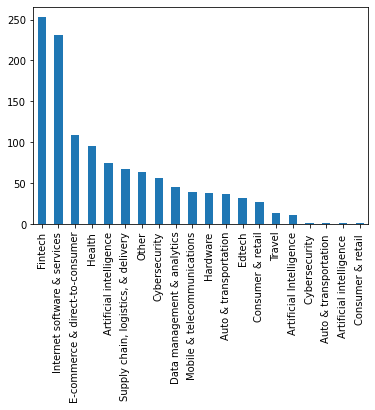

In [5]:
print(data['Industry'].value_counts())
data['Industry'].value_counts().plot(kind='bar')

As can be seen, Fintech has the highest number of startups, followed by internet software companies.

# 1.2 Let's see which year has the most startups established And which are they

<AxesSubplot:>

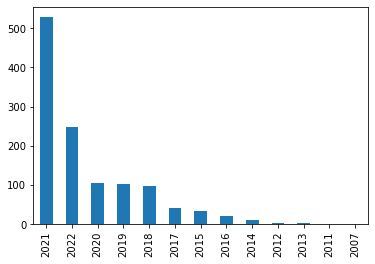

In [6]:
data['Year Joined'].value_counts().plot(kind='bar')

In [7]:
Compony_22=data.loc[data['Year Joined'] == 2022]
Compony_22['Company']

0                   Esusu
1              Fever Labs
2                   Minio
3               Darwinbox
4                 Pentera
              ...        
242                 Qonto
243    The Boring Company
244                 RELEX
245                KuCoin
246                  Miro
Name: Company, Length: 247, dtype: object

In [8]:
data = data.rename(columns={'Last Valuation (Billion $)': 'Valuation'})

In [9]:
# data.loc[(data.Industry == 'Fintech') & (data.Valuation>=20)]

In [10]:
df_by_country=data.groupby(['Country','Industry'])['Valuation'].count()
df_by_country

Country        Industry                           
Argentina      Fintech                                 1
Australia      E-commerce & direct-to-consumer         1
               Fintech                                 2
               Internet software & services            5
Austria        Edtech                                  1
                                                      ..
United States  Other                                  33
               Supply chain, logistics, & delivery    26
               Travel                                  1
Vietnam        Fintech                                 1
               Internet software & services            1
Name: Valuation, Length: 216, dtype: int64

In [12]:
df_by_country_n=df_by_country.unstack().sum(axis=1)
df_by_country_n

Country
Argentina                 1.0
Australia                 8.0
Austria                   2.0
Bahamas                   1.0
Belgium                   3.0
Bermuda                   1.0
Brazil                   16.0
Canada                   19.0
Chile                     2.0
China                   173.0
Colombia                  3.0
Croatia                   2.0
Czech Republic            1.0
Denmark                   2.0
Ecuador                   1.0
Estonia                   2.0
Finland                   4.0
France                   24.0
Germany                  29.0
Hong Kong                 7.0
India                    70.0
Indonesia                 7.0
Ireland                   6.0
Israel                   23.0
Italy                     2.0
Japan                     6.0
Liechtenstein             1.0
Lithuania                 2.0
Luxembourg                1.0
Malaysia                  1.0
Mexico                    8.0
Netherlands               7.0
Nigeria                   1.0
No

In [13]:
pct=df_by_country/df_by_country_n

<AxesSubplot:xlabel='Country'>

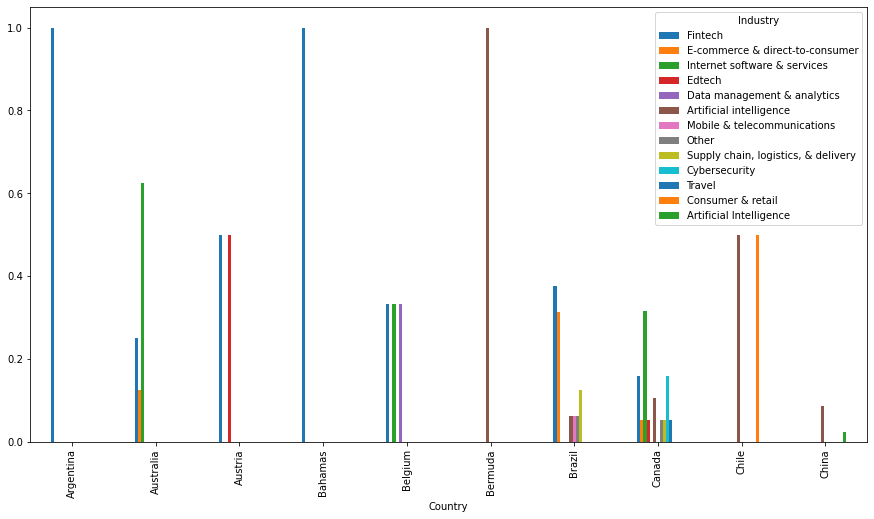

In [27]:
pct.head(30).unstack().plot(kind="bar",figsize=(15,8))